In [1]:
print("!! Jai Ganesh !!")

!! Jai Ganesh !!


In [2]:
#pip install tabula-py

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import tabula

In [4]:
file1 = "ACLED_Codebook_v1_January-2021.pdf"
table = tabula.read_pdf(file1,pages='all')

In [5]:
#table[2]

In [6]:
table[0].columns=(['Column Name','Content'])

In [7]:
table[0]=table[0].drop(index=0,axis=0)

In [8]:
#table[0]

In [9]:
table[2].columns=(['Column Name','Content'])

In [10]:
#table[2]

In [11]:
column_content=pd.concat([table[0],table[2]],axis=0).reset_index()

In [12]:
column_content=column_content.drop('index',axis=1)

In [13]:
column_content

,Column Name,Content
0,ISO,A numeric code for each individual country
1,EVENT_ID_CNTY,Anindividualidentifierbynumberandcountryacrony...
2,EVENT_ID_NO_CNTY,An individual numeric identifier (updated annu...
3,EVENT_DATE,"The day, month and year on which an event took..."
4,YEAR,The year in which an event took place
5,TIME_PRECISION,A numeric code indicating the level of certain...
6,EVENT_TYPE,The type of event
7,SUB_EVENT_TYPE,The type of sub-event
8,ACTOR1,The named actor involved in the event
9,ASSOC_ACTOR_1,The named actor associated with or identifying...


In [14]:
df=pd.read_csv('2016-2022.csv')

In [15]:
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


Lets drop the columns 'data_id', 'iso', 'event_id_cnty','event_id_no_cnty','timestamp','iso3','latitude','longitude' as they provide just identificaton numbers of each event in different way.

In [16]:
df=df.drop(['data_id', 'iso', 'event_id_cnty','event_id_no_cnty','timestamp','iso3','latitude','longitude'],axis=1)

let's add 'Month' column

In [17]:
df['month']=df['event_date'].apply(lambda x:x.split(' ')[1])

In [18]:
df.head()

,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,geo_precision,source,source_scale,notes,fatalities,month
0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,March
1,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,March
2,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,March
3,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,March
4,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,March


Events per year:

<AxesSubplot:xlabel='year', ylabel='Count'>

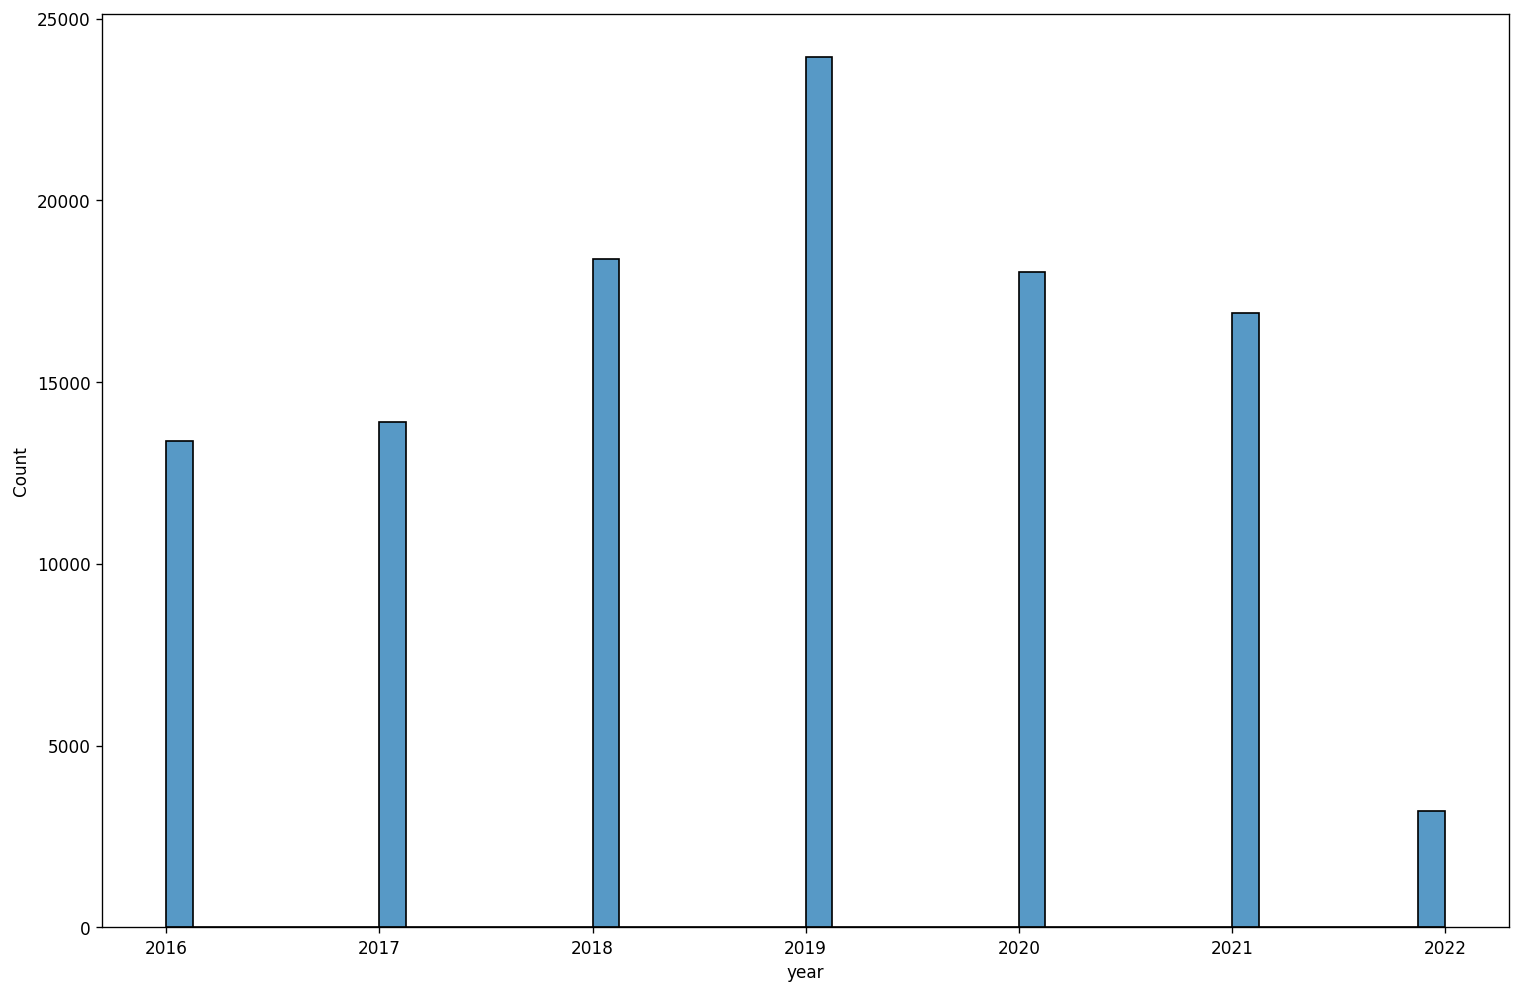

In [19]:
plt.figure(figsize=(15,10),dpi=121)
sns.histplot(df['year'])

In [20]:
df['event_type'].unique()

array(['Riots', 'Protests', 'Violence against civilians',
       'Strategic developments', 'Battles', 'Explosions/Remote violence'],
      dtype=object)

<AxesSubplot:xlabel='year', ylabel='count'>

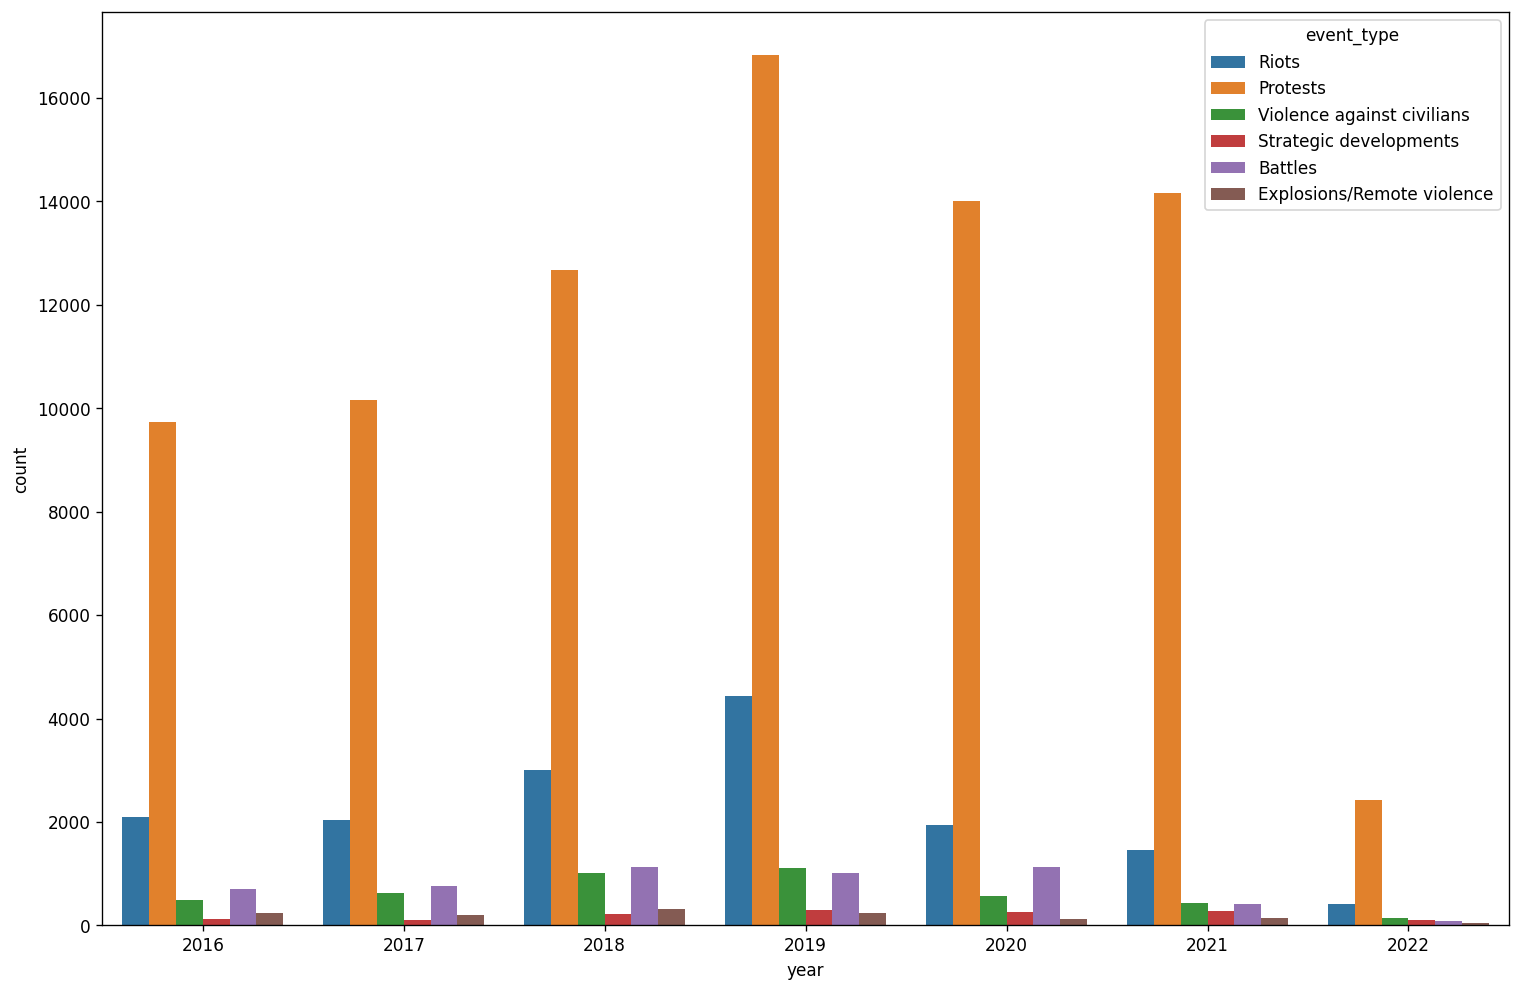

In [21]:
plt.figure(figsize=(15,10),dpi=121)
sns.countplot(x=df['year'],hue=df['event_type'])

There was an elections in 2019, Protest has to high!

In [22]:
df['event_type'].value_counts()

Protests                      79978
Riots                         15415
Battles                        5222
Violence against civilians     4397
Strategic developments         1391
Explosions/Remote violence     1287
Name: event_type, dtype: int64

<AxesSubplot:xlabel='event_type', ylabel='count'>

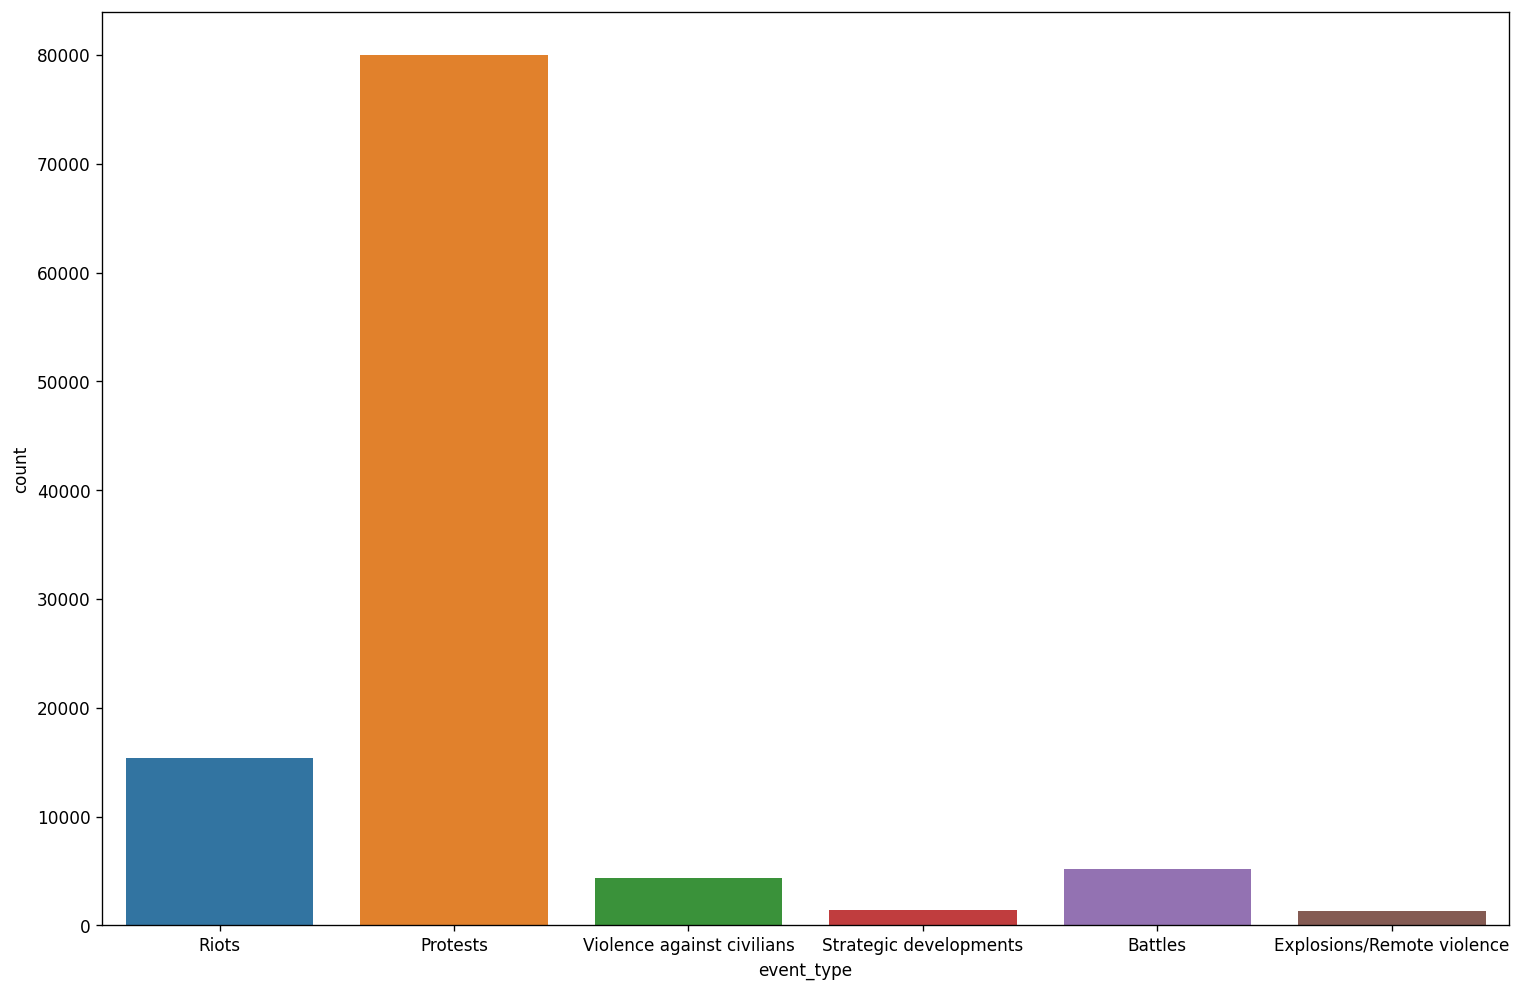

In [23]:
plt.figure(figsize=(15,10),dpi=121)
sns.countplot(x=df['event_type'])

states with 'Protests' count:

<AxesSubplot:xlabel='count', ylabel='admin1'>

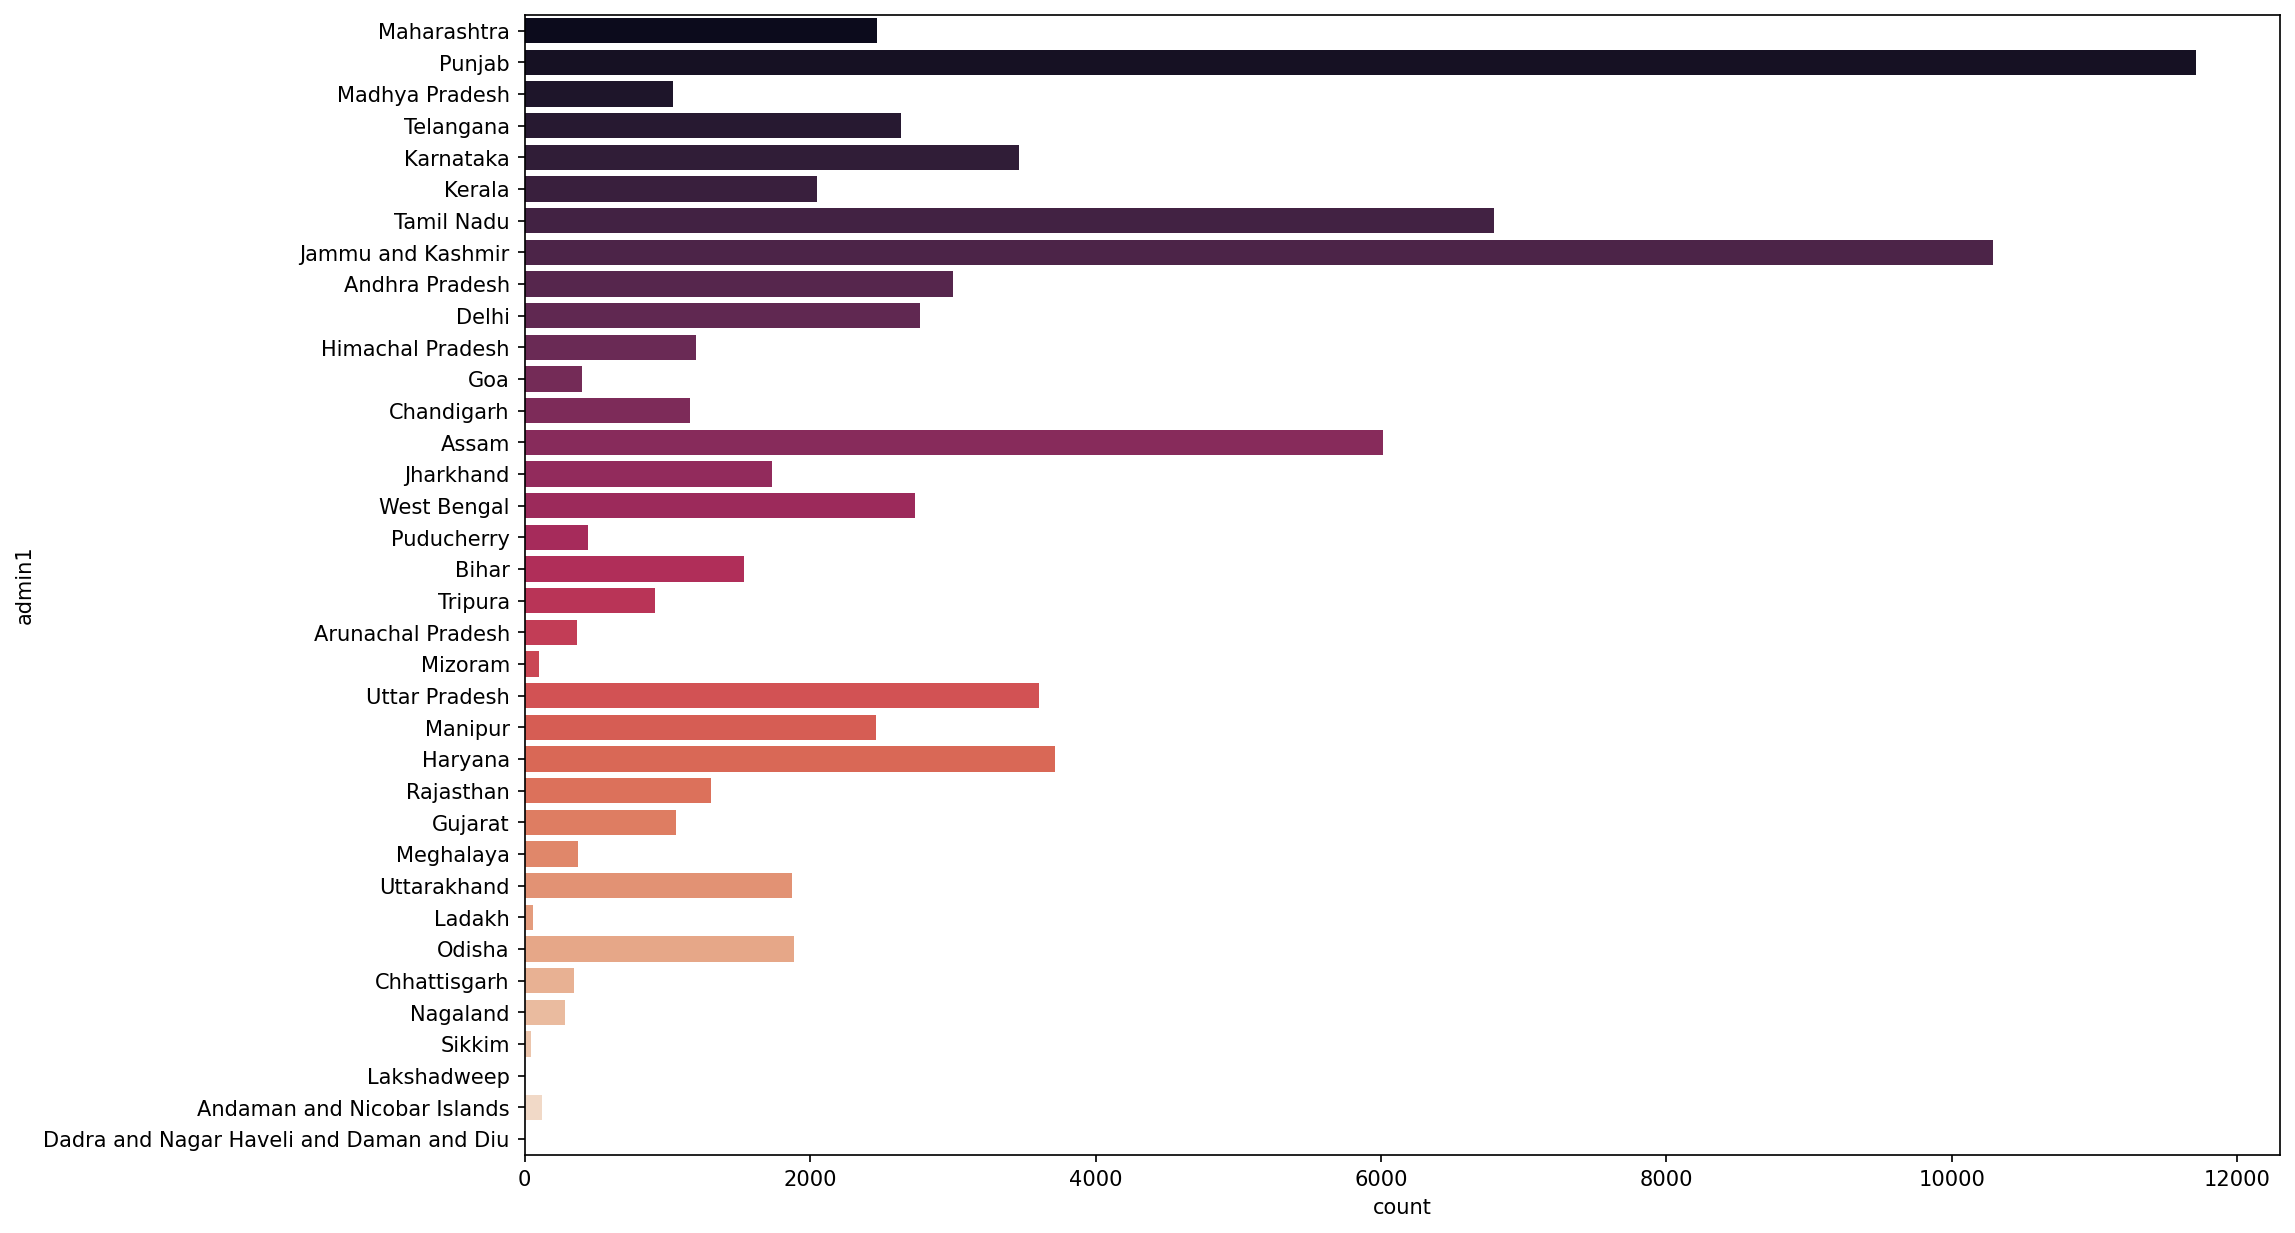

In [24]:
plt.figure(figsize=(15,10),dpi=151)
sns.countplot(y=df[df['event_type']=='Protests']['admin1'],palette='rocket')

In [25]:
df[(df['event_type']=='Protests') & (df['admin1']=='Punjab')]['admin1'].value_counts()

Punjab    11712
Name: admin1, dtype: int64

In [26]:
df.head()

,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,geo_precision,source,source_scale,notes,fatalities,month
0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,March
1,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,March
2,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,March
3,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,March
4,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,March


Sub event type counts

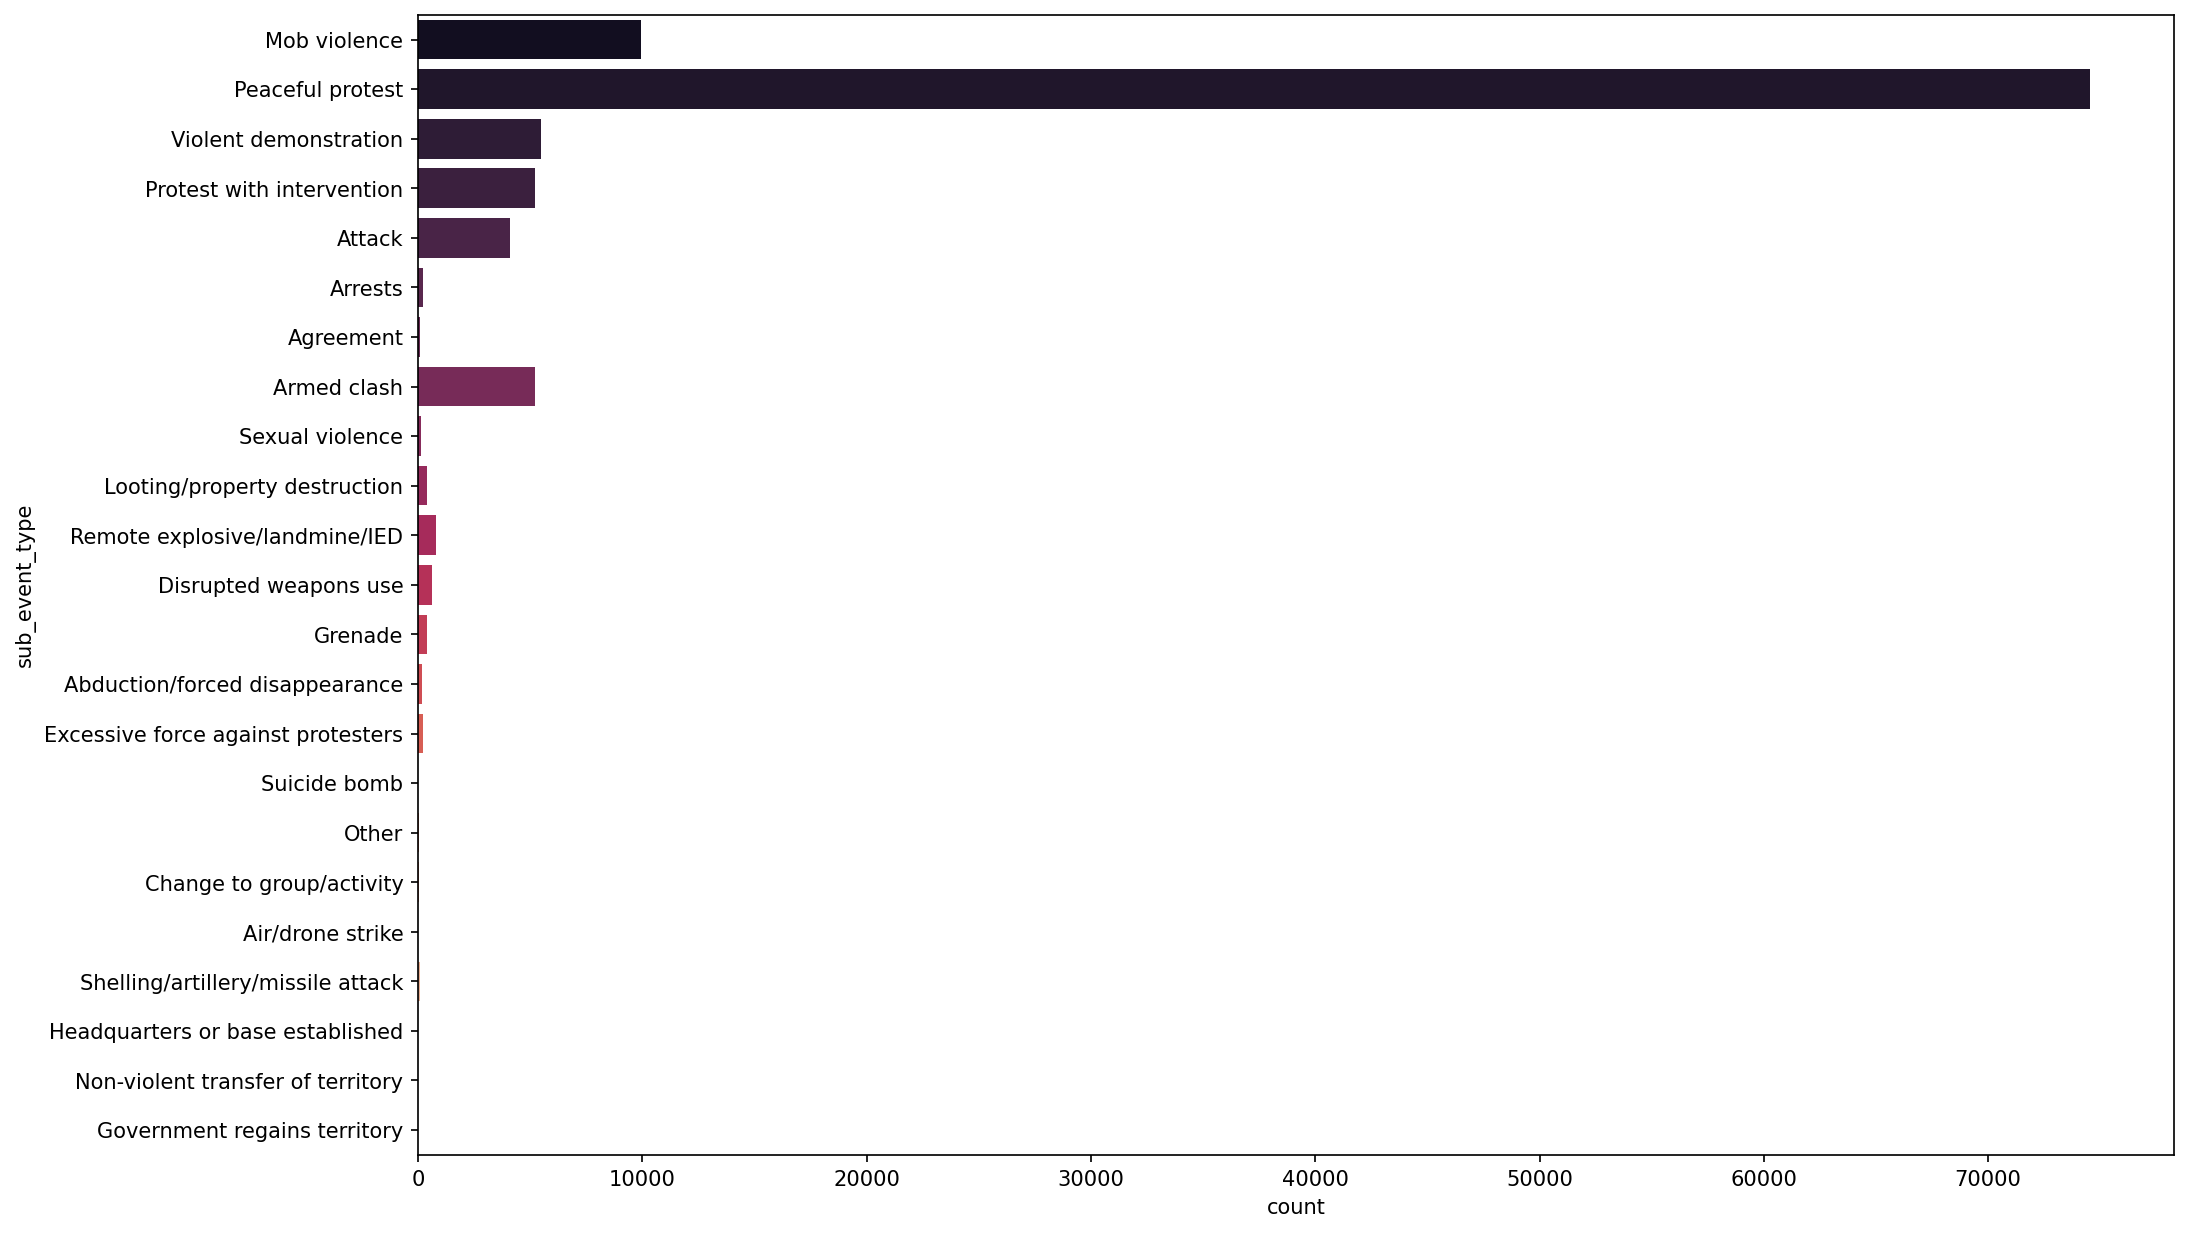

In [27]:
plt.figure(figsize=(15,10),dpi=151)
sns.countplot(y=df['sub_event_type'],palette='rocket')
plt.show()

States with 'Riot' count:

<AxesSubplot:xlabel='count', ylabel='admin1'>

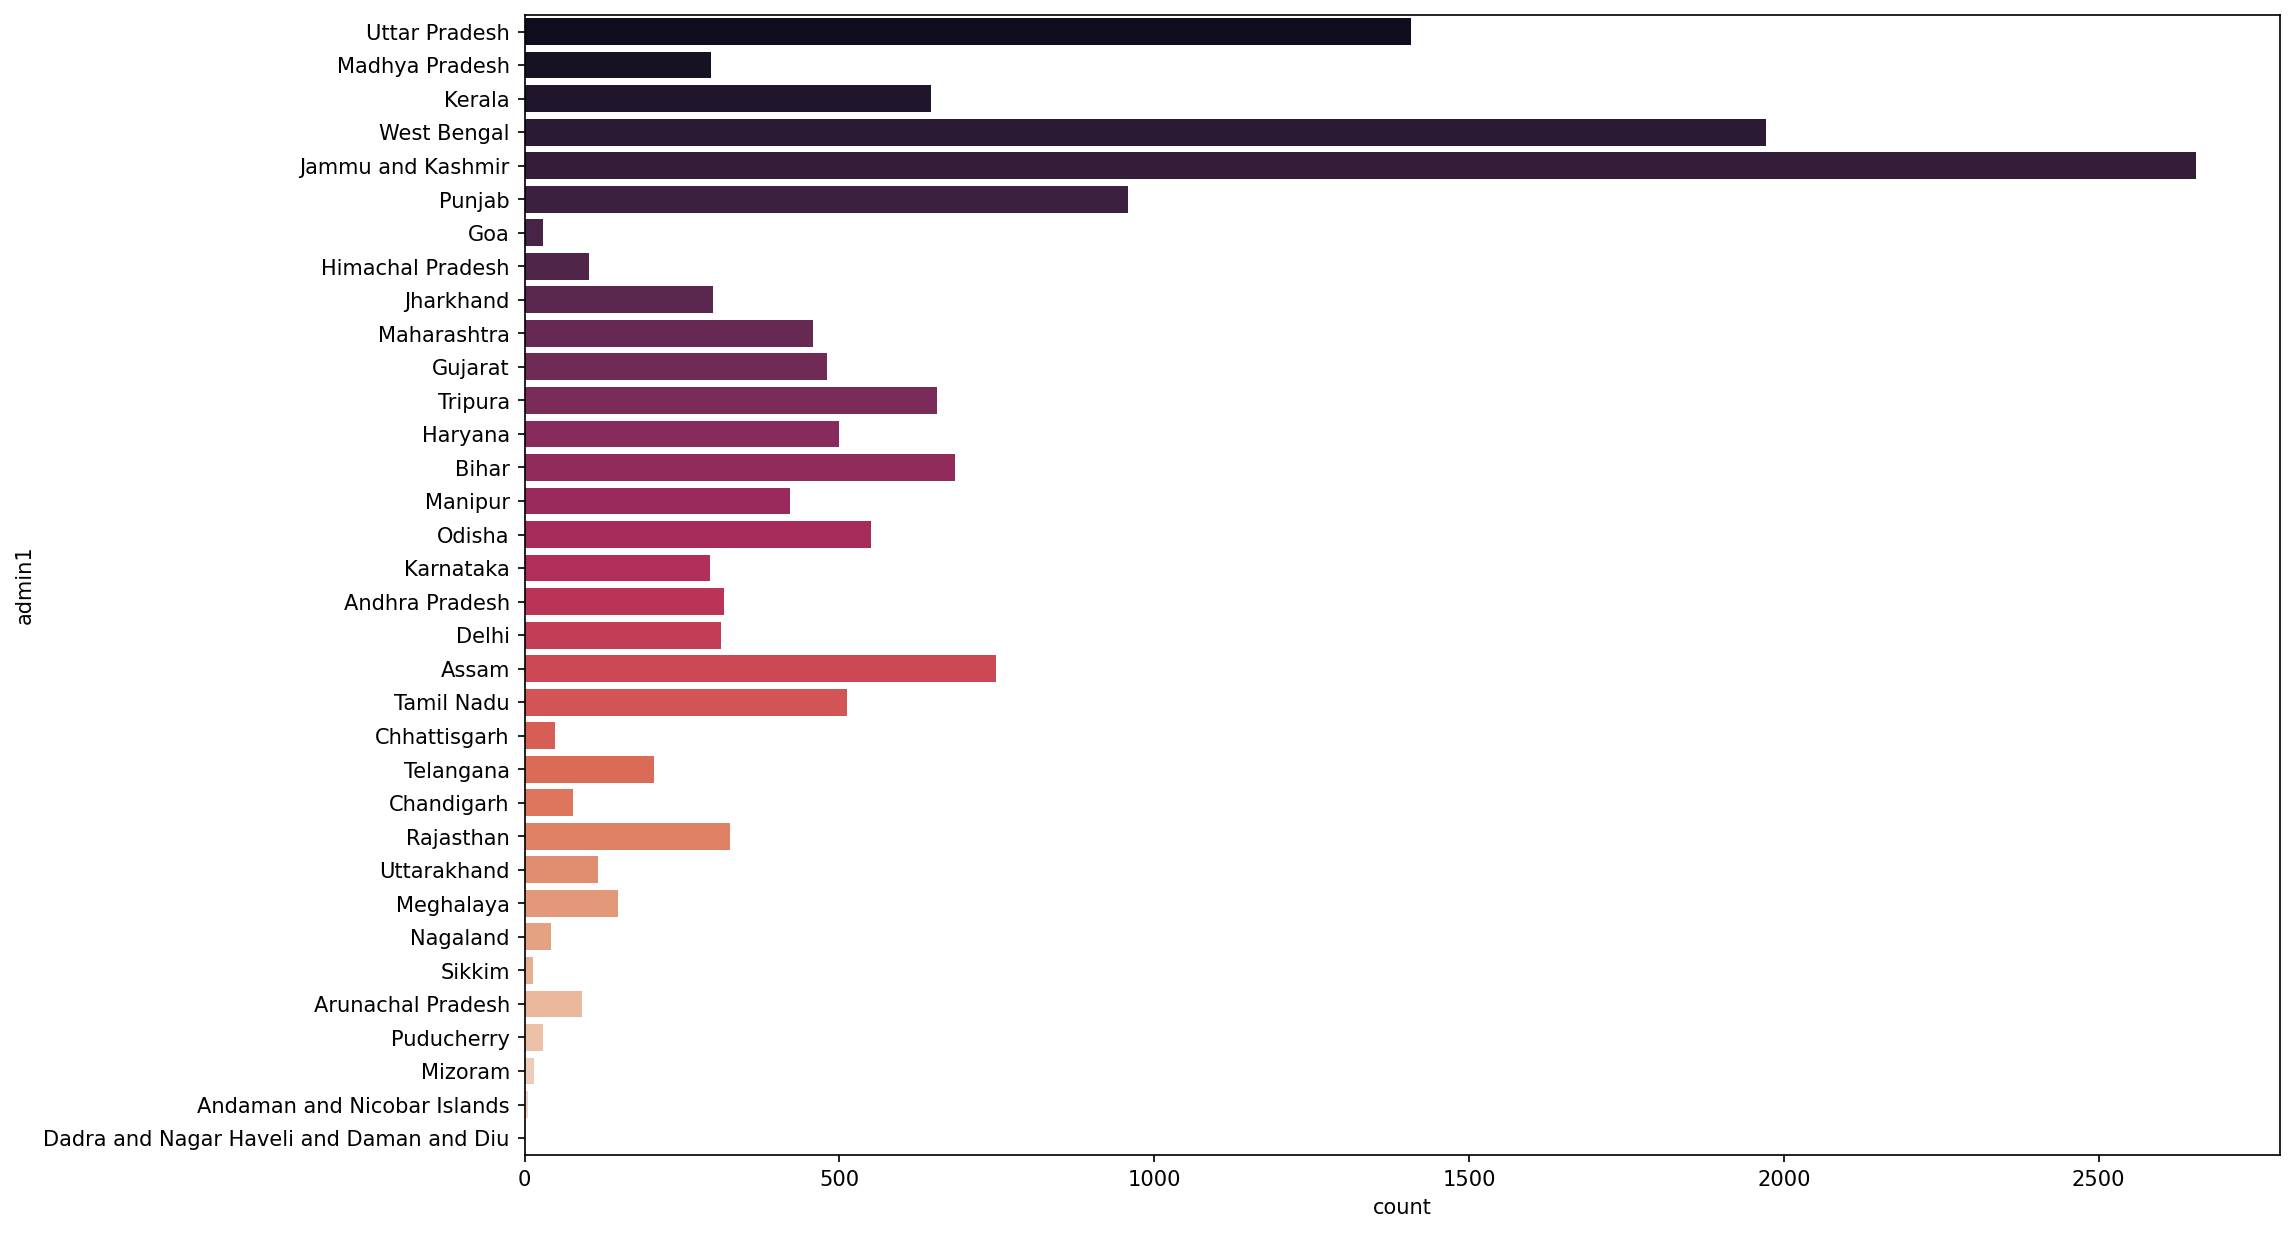

In [28]:
plt.figure(figsize=(15,10),dpi=151)
sns.countplot(y=df[df['event_type']=='Riots']['admin1'],palette='rocket')